# **10 NIMs in 10 MINs** (isn't that clever?) #

In [1]:
# NIM access examples notebook
# creator: kevin mccall (kmccall)
# updated: 5 oct 2024
#
# see accompanying readme file for:
#   * NIM models included in this file (17 currently)
#   * common errors encountered
#   * client setup instructions to run locally

In [57]:
import requests, base64, json, zipfile, uuid, time, os
import numpy as np
import pandas as pd
import PIL.Image

from openai import OpenAI
from config_km import key
from io import BytesIO
from IPython.display import Image, Video
from sklearn.metrics.pairwise import cosine_similarity

api_key    = key
bearer_key = 'Bearer ' + key                        # bearer token is concatenation of 'Bearer ' + NGC API key
model_url  = 'https://integrate.api.nvidia.com/v1'  # base url for access to all nim models in NGC repository
nim        = '<<<FIXME>>>'                          # update this uri for every model accessed

# standard openAI chat API helper function
def get_completion(prompt, model=nim):
    completion = client.chat.completions.create(model=model, messages=[{"role":"user","content":prompt}],
                                                temperature=0.1, top_p=0.7,  max_tokens=512, stream=False)
    return completion

## **reasoning | meta ***llama-3.1-70b-instruct*** | language model** ##
### medium-sized general reasoning model ###

In [3]:
nim      = 'meta/llama-3.1-70b-instruct'
client   = OpenAI(base_url=model_url, api_key=api_key)
prompt   = 'write a sad origin story about mary\'s little lamb before her adoption by mary. please limit to 150 words.'
response = get_completion(prompt, nim)
print(response.choices[0].message.content)

In a small, rural farm, a lamb was born to a ewe who had lost her mate to a brutal storm. The ewe, weak and grieving, struggled to care for her newborn. As the days passed, she grew weaker, and the lamb was left to fend for itself. The farmer, overwhelmed with his own losses, couldn't provide the necessary care, and the lamb was left to wander the desolate fields, searching for comfort and nourishment.

As the lamb grew, it became clear that it was an outcast among the flock. The other sheep would shun it, and the lamb would often go hungry. The ewe, now gone, had left behind a legacy of loneliness and abandonment. The lamb's only solace was the sound of its own bleating, a haunting reminder of its isolation. It was a small, forgotten creature, waiting for a chance to be loved.


## **reasoning | meta ***llama-3.1-405b-instruct*** | frontier language model** ##
### very large foundation language model ###

In [4]:
nim      = 'meta/llama-3.1-405b-instruct'
client   = OpenAI(base_url=model_url, api_key=api_key)
prompt   = 'my therapist told me that when i was young my interpersonal relationships were negatively impacted by my desire \
            for external validation, which is a bit ironic since i am a severe introvert.  i mean i read the whole book \
            \'quiet\' by susan cain and i was all the way at the end of the introversion continuum. \
            are these two personal attributes at odds? as a severe introvert why would i care about external validation? \
            please limit your answer to 300 words because i am a very impatient introvert.'
response = get_completion(prompt, nim) 
print(response.choices[0].message.content)

A self-aware introvert! It's not uncommon for introverts to struggle with the desire for external validation, despite their preference for solitude. While it may seem counterintuitive, these two attributes aren't necessarily at odds. Here's why:

As a severe introvert, you might be more inclined to observe and listen, which can make you highly attuned to the opinions and expectations of others. This sensitivity can lead to a desire for external validation, as you may feel like you're constantly seeking permission or approval from others to feel worthy. This can be especially true if you grew up in an environment where your worth was tied to external achievements or praise.

Moreover, introverts often have a rich inner world, and their self-worth may be deeply tied to their thoughts, feelings, and reflections. However, this introspection can sometimes manifest as self-doubt or a need for external reassurance. It's as if you're seeking a "stamp of approval" from others to validate your o

## **reasoning | nvidia ***nemotron-4 340b*** | language model** ##
### large synthetic data generation model ###

In [5]:
nim      = 'nvidia/nemotron-4-340b-instruct'
client   = OpenAI(base_url=model_url, api_key=api_key)
prompt   = 'create 10 data samples that represent fictitious attendees at a technology conference. \
            each attendee should have these 5 fields: \
            name: full name of the person \
            company: name of company that they work for \
            title: official title in their role at company above \
            email: first initial of first name concatenated with full last name followed by @ symbol then name of company \
            interest: name of a domain within the technology industry \
            \
            here are two examples of attendee data: \
            EXAMPLE 1 \
            name: todd miller \
            company: dell \
            title: CIO \
            email: tmiller@dell.com \
            interest: generative AI \
            \
            EXAMPLE 2 \
            name: maria rodriguez \
            company: lucent \
            title: CFO \
            email: mrodriguez@lucent.com \
            interest: finserv AI models'

response = get_completion(prompt, nim)
print(response.choices[0].message.content)

Sure, I'd be happy to help you create 10 fictitious attendees for a technology conference. Here they are:

1. Name: Alex Johnson
   Company: Microsoft
   Title: Senior Software Engineer
   Email: ajohnson@microsoft.com
   Interest: Cloud Computing

2. Name: Samantha Lee
   Company: Google
   Title: Director of Product Management
   Email: slee@google.com
   Interest: Machine Learning

3. Name: Michael Davis
   Company: Amazon
   Title: Principal Technical Program Manager
   Email: mdavis@amazon.com
   Interest: IoT and Smart Homes

4. Name: Emily Thompson
   Company: IBM
   Title: Chief Data Scientist
   Email: ethompson@ibm.com
   Interest: Quantum Computing

5. Name: James Brown
   Company: Apple
   Title: Senior Director of Engineering
   Email: jbrown@apple.com
   Interest: Augmented Reality

6. Name: Sophia Garcia
   Company: Cisco
   Title: Vice President of Cybersecurity
   Email: sgarcia@cisco.com
   Interest: Cybersecurity Threat Intelligence

7. Name: Daniel Wilson
   Company

In [6]:
# would be much more graceful to display this in a pandas dataframe table so let's do that instead
nim      = 'nvidia/nemotron-4-340b-instruct'
client   = OpenAI(base_url=model_url, api_key=api_key)
prompt   = 'create 8 data samples that represent fictitious attendees at a technology conference. \
            output the entire set of attendees as a well-formed python dictionary. \
            do not output any comments or explanations before or after the python dictionary. \
            each attendee should have these 5 fields: \
            name: full name of the person \
            company: name of company that they work for \
            title: official title in their role at company above \
            email: first initial of first name concatenated with full last name followed by @ symbol then name of company \
            interest: name of a domain within the technology industry \
            \
            here are two examples of attendee data: \
            EXAMPLE 1 \
            name: todd miller \
            company: dell \
            title: CIO \
            email: tmiller@dell.com \
            interest: generative AI \
            \
            EXAMPLE 2 \
            name: maria rodriguez \
            company: lucent \
            title: CFO \
            email: mrodriguez@lucent.com \
            interest: finserv AI models'

response  = get_completion(prompt, nim)
attendees = json.loads(response.choices[0].message.content)
attendee_data = [{
                    "Name": item["name"],
                    "Company": item["company"],
                    "Title": item["title"],
                    "Email": item["email"],
                    "Interest": item["interest"]
                 }
                 for item in attendees.values()]

df = pd.DataFrame(attendee_data)
pd.set_option('display.width', 120)
print(df)

              Name    Company                  Title                  Email               Interest
0      todd miller       dell                    CIO       tmiller@dell.com          generative AI
1  maria rodriguez     lucent                    CFO  mrodriguez@lucent.com      finserv AI models
2         john doe  microsoft      Software Engineer     jdoe@microsoft.com        cloud computing
3       jane smith     google         Data Scientist      jsmith@google.com       machine learning
4     mike johnson        ibm  Cybersecurity Analyst       mjohnson@ibm.com          cybersecurity
5         sara lee     amazon        Product Manager        slee@amazon.com  e-commerce technology
6        david kim   facebook            UX Designer      dkim@facebook.com        user experience
7      emily brown      apple      Hardware Engineer       ebrown@apple.com      computer hardware


## **reasoning | microsoft ***phi-3.5 4b*** | small language model** ##
### small problem-solving model ###

In [7]:
nim      = 'microsoft/phi-3.5-mini-instruct'
client   = OpenAI(base_url=model_url, api_key=api_key)
prompt   = 'provide the definition of the ideal gas law.  \
            explain how the components of the ideal gas law apply to a balloon rising up from a child at disneyland. \
            please limit to 150 words in the child example.'

response = get_completion(prompt, nim)
print(response.choices[0].message.content)

The ideal gas law is a fundamental equation in chemistry and physics, expressed as PV=nRT, where P is pressure, V is volume, n is the number of moles of gas, R is the universal gas constant, and T is temperature in Kelvin.


In the context of a balloon rising at Disneyland, the ideal gas law helps explain why the balloon expands as it ascends. As the balloon rises, the atmospheric pressure decreases because there is less air above pushing down. According to the ideal gas law, if the temperature (T) remains constant and the pressure (P) decreases, the volume (V) must increase to maintain the equality (PV=nRT). This expansion of the balloon is why it looks larger as it climbs higher in the sky. The gas inside the balloon, typically helium, responds to the change in external pressure, illustrating the direct relationship between pressure and volume in the ideal gas law.


## **reasoning | meta ***llama-3.2-3b-instruct*** | small language model** ##
### small reasoning and decoder model ###

In [8]:
nim      = 'meta/llama-3.2-3b-instruct'
client   = OpenAI(base_url=model_url, api_key=api_key)
response = get_completion(prompt, nim)
print(response.choices[0].message.content)

The ideal gas law is a mathematical equation that describes the behavior of ideal gases: PV = nRT, where:

* P is the pressure of the gas
* V is the volume of the gas
* n is the number of moles of gas
* R is the gas constant
* T is the temperature of the gas in Kelvin

Now, let's apply this to a balloon rising up from a child at Disneyland:

As the child blows air into the balloon, the pressure (P) inside the balloon increases. The balloon expands, and its volume (V) increases. The air inside the balloon is heated by the child's breath, causing the temperature (T) to rise. As the temperature increases, the air molecules move faster and spread out, increasing the volume of the balloon. The number of moles (n) of air inside the balloon remains constant. As the balloon rises, the air pressure decreases, allowing the balloon to expand further.


## **reasoning | meta ***llama-3.2-1b-instruct*** | small language model** ##
### (very) small reasoning and decoder model ###

In [9]:
nim      = 'meta/llama-3.2-1b-instruct'
client   = OpenAI(base_url=model_url, api_key=api_key)
response = get_completion(prompt, nim)
print(response.choices[0].message.content)

**Definition of the Ideal Gas Law:**

The ideal gas law is a mathematical equation that describes the behavior of ideal gases, which are hypothetical gases that obey the laws of thermodynamics. The three main components of the ideal gas law are:

1. **PV = nRT**: Pressure (P), Volume (V), Number of moles (n), Temperature (T), and Gas constant (R)
2. **PV = nRT**: This equation is the same as the first one, but it's often used to calculate the number of moles (n) of a gas.
3. **PV = nRT**: This equation is used to calculate the volume (V) of a gas.

**Applying the Ideal Gas Law to a Balloon Rising at Disneyland:**

Imagine a child at Disneyland, holding a balloon. As the child releases the balloon, it rises into the air. According to the ideal gas law, the pressure (P) of the air inside the balloon decreases as it rises, while the volume (V) of the balloon increases. The number of moles (n) of air in the balloon remains constant, as the child releases the same amount of air. The tempera

## **reasoning | nvidia ***mistral-nemo-12b-instruct*** | language model** ##
### coding and multi-lingual task model ###

In [10]:
nim      = 'nv-mistralai/mistral-nemo-12b-instruct'
client   = OpenAI(base_url=model_url, api_key=api_key)

# coding challenge first
prompt   = 'write a python function that: \
            * accepts a list of paths to jpg image files \
            * for each path string in the list: \
            * opens the image file  \
            * converts the file to base64 encoding  \
            * pre-pends the appropriate text to upload it to a vision language model as a string \
            * returns a list of processed base64 strings'
response = get_completion(prompt, nim)
print(response.choices[0].message.content)

Here's a Python function that fulfills your requirements using the `PIL` library for image processing and `base64` for encoding:

```python
from PIL import Image
import io
import base64

def process_images(image_paths):
    processed_images = []
    for path in image_paths:
        with Image.open(path) as img:
            # Convert image to base64
            buffer = io.BytesIO()
            img.save(buffer, format='JPEG')
            img_str = base64.b64encode(buffer.getvalue()).decode('utf-8')

            # Prepend text for vision language model upload
            img_str = f"data:image/jpeg;base64,{img_str}"

            processed_images.append(img_str)

    return processed_images
```

You can use this function like this:

```python
image_paths = ["path/to/image1.jpg", "path/to/image2.jpg"]
processed_images = process_images(image_paths)
print(processed_images)
```

This will output a list of base64 strings, each prepended with the appropriate text for uploading to a vision langu

In [11]:
# language translation challenge second
prompt   = 'translate the following sentence to both french and spanish: \
            the night was moist. the IT manager watched CNBC in breathless anticipation of the julie and jensen conversation about \
            the new partnership between accenture and nvidia'
response = get_completion(prompt, nim)
print(response.choices[0].message.content)

**French:**
La nuit était humide. Le responsable informatique regardait CNBC avec une anticipation haletante pour la conversation entre Julie et Jensen au sujet de la nouvelle partenariat entre Accenture et Nvidia.

**Spanish:**
La noche estaba húmeda. El gerente de TI miraba CNBC con una anticipación jadeante por la conversación entre Julie y Jensen sobre la nueva asociación entre Accenture y Nvidia.


## **vision | nvidia ***vila*** | vision language model** ##
### multi-model vision language model that understands both text and images ###

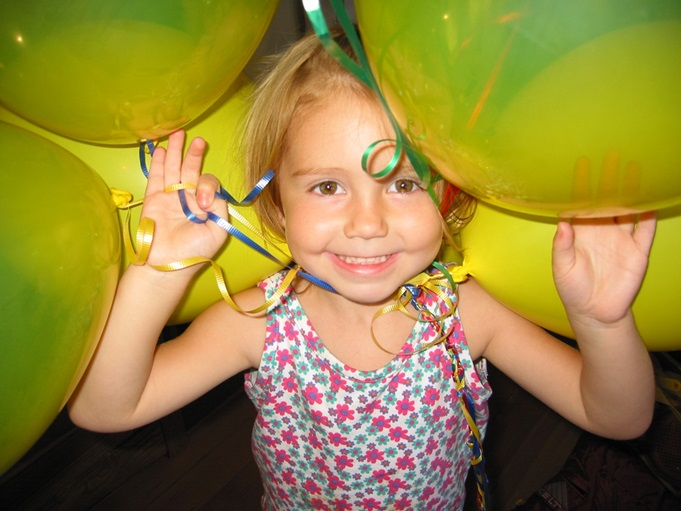

In [39]:
photo  = 'images/ruby-balloons.jpg'    # DEF input filename
Image(filename=photo)

In [40]:
nim    = 'https://ai.api.nvidia.com/v1/vlm/nvidia/vila'
prompt = 'describe what is in this scene?'   # DEF query prompt
stream = False

with open(photo, "rb") as f:
    image_b64 = base64.b64encode(f.read()).decode()

headers = {"Authorization": bearer_key,
           "Accept": "text/event-stream" if stream else "application/json"}

payload = {"messages": [{"role": "user",
                         "content": f'{prompt} <img src="data:image/png;base64,{image_b64}" />'}],  
           "max_tokens": 1024,
           "temperature": 0.20,
           "top_p": 0.70,
           "seed": 50,
           "stream": False}

response = requests.post(nim, headers=headers, json=payload)
response_json = json.loads(response.content)
print(response_json['choices'][0]['message']['content'])

In the heart of the image, a young girl radiates joy, her smile as bright as the yellow balloons she holds. She's dressed in a pink dress adorned with white flowers, adding a touch of innocence to the scene. The balloons, a vibrant yellow, are tied together with blue ribbons, creating a playful contrast against the girl's pink dress.

The girl is standing in front of a black background, which serves to highlight her and the balloons even more. The balloons are not just in her hands; they seem to be floating around her, almost as if she's in a world of her own, surrounded by these cheerful objects.

The image captures a moment of pure happiness and innocence, with the girl and her balloons being the main focus. The colors, the girl's attire, and the balloons all contribute to creating a lively and joyful atmosphere. It's a snapshot of a moment that feels both timeless and full of life.


In [18]:
print(response_json)

{'type': 'urn:inference-service:problem-details:internal-server-error', 'title': 'Internal Server Error', 'status': 500, 'detail': 'Hit queue timeout while waiting for Triton', 'instance': '/v2/nvcf/pexec/functions/1c8df143-2303-419b-8b28-b4dd82cfe113', 'requestId': '466addee-cb87-4a62-9c1f-1bc4237e38ea'}


## **vision | microsoft ***kosmos-2*** | vision language model** ##
### understanding and reasoning about visual elements in images ###

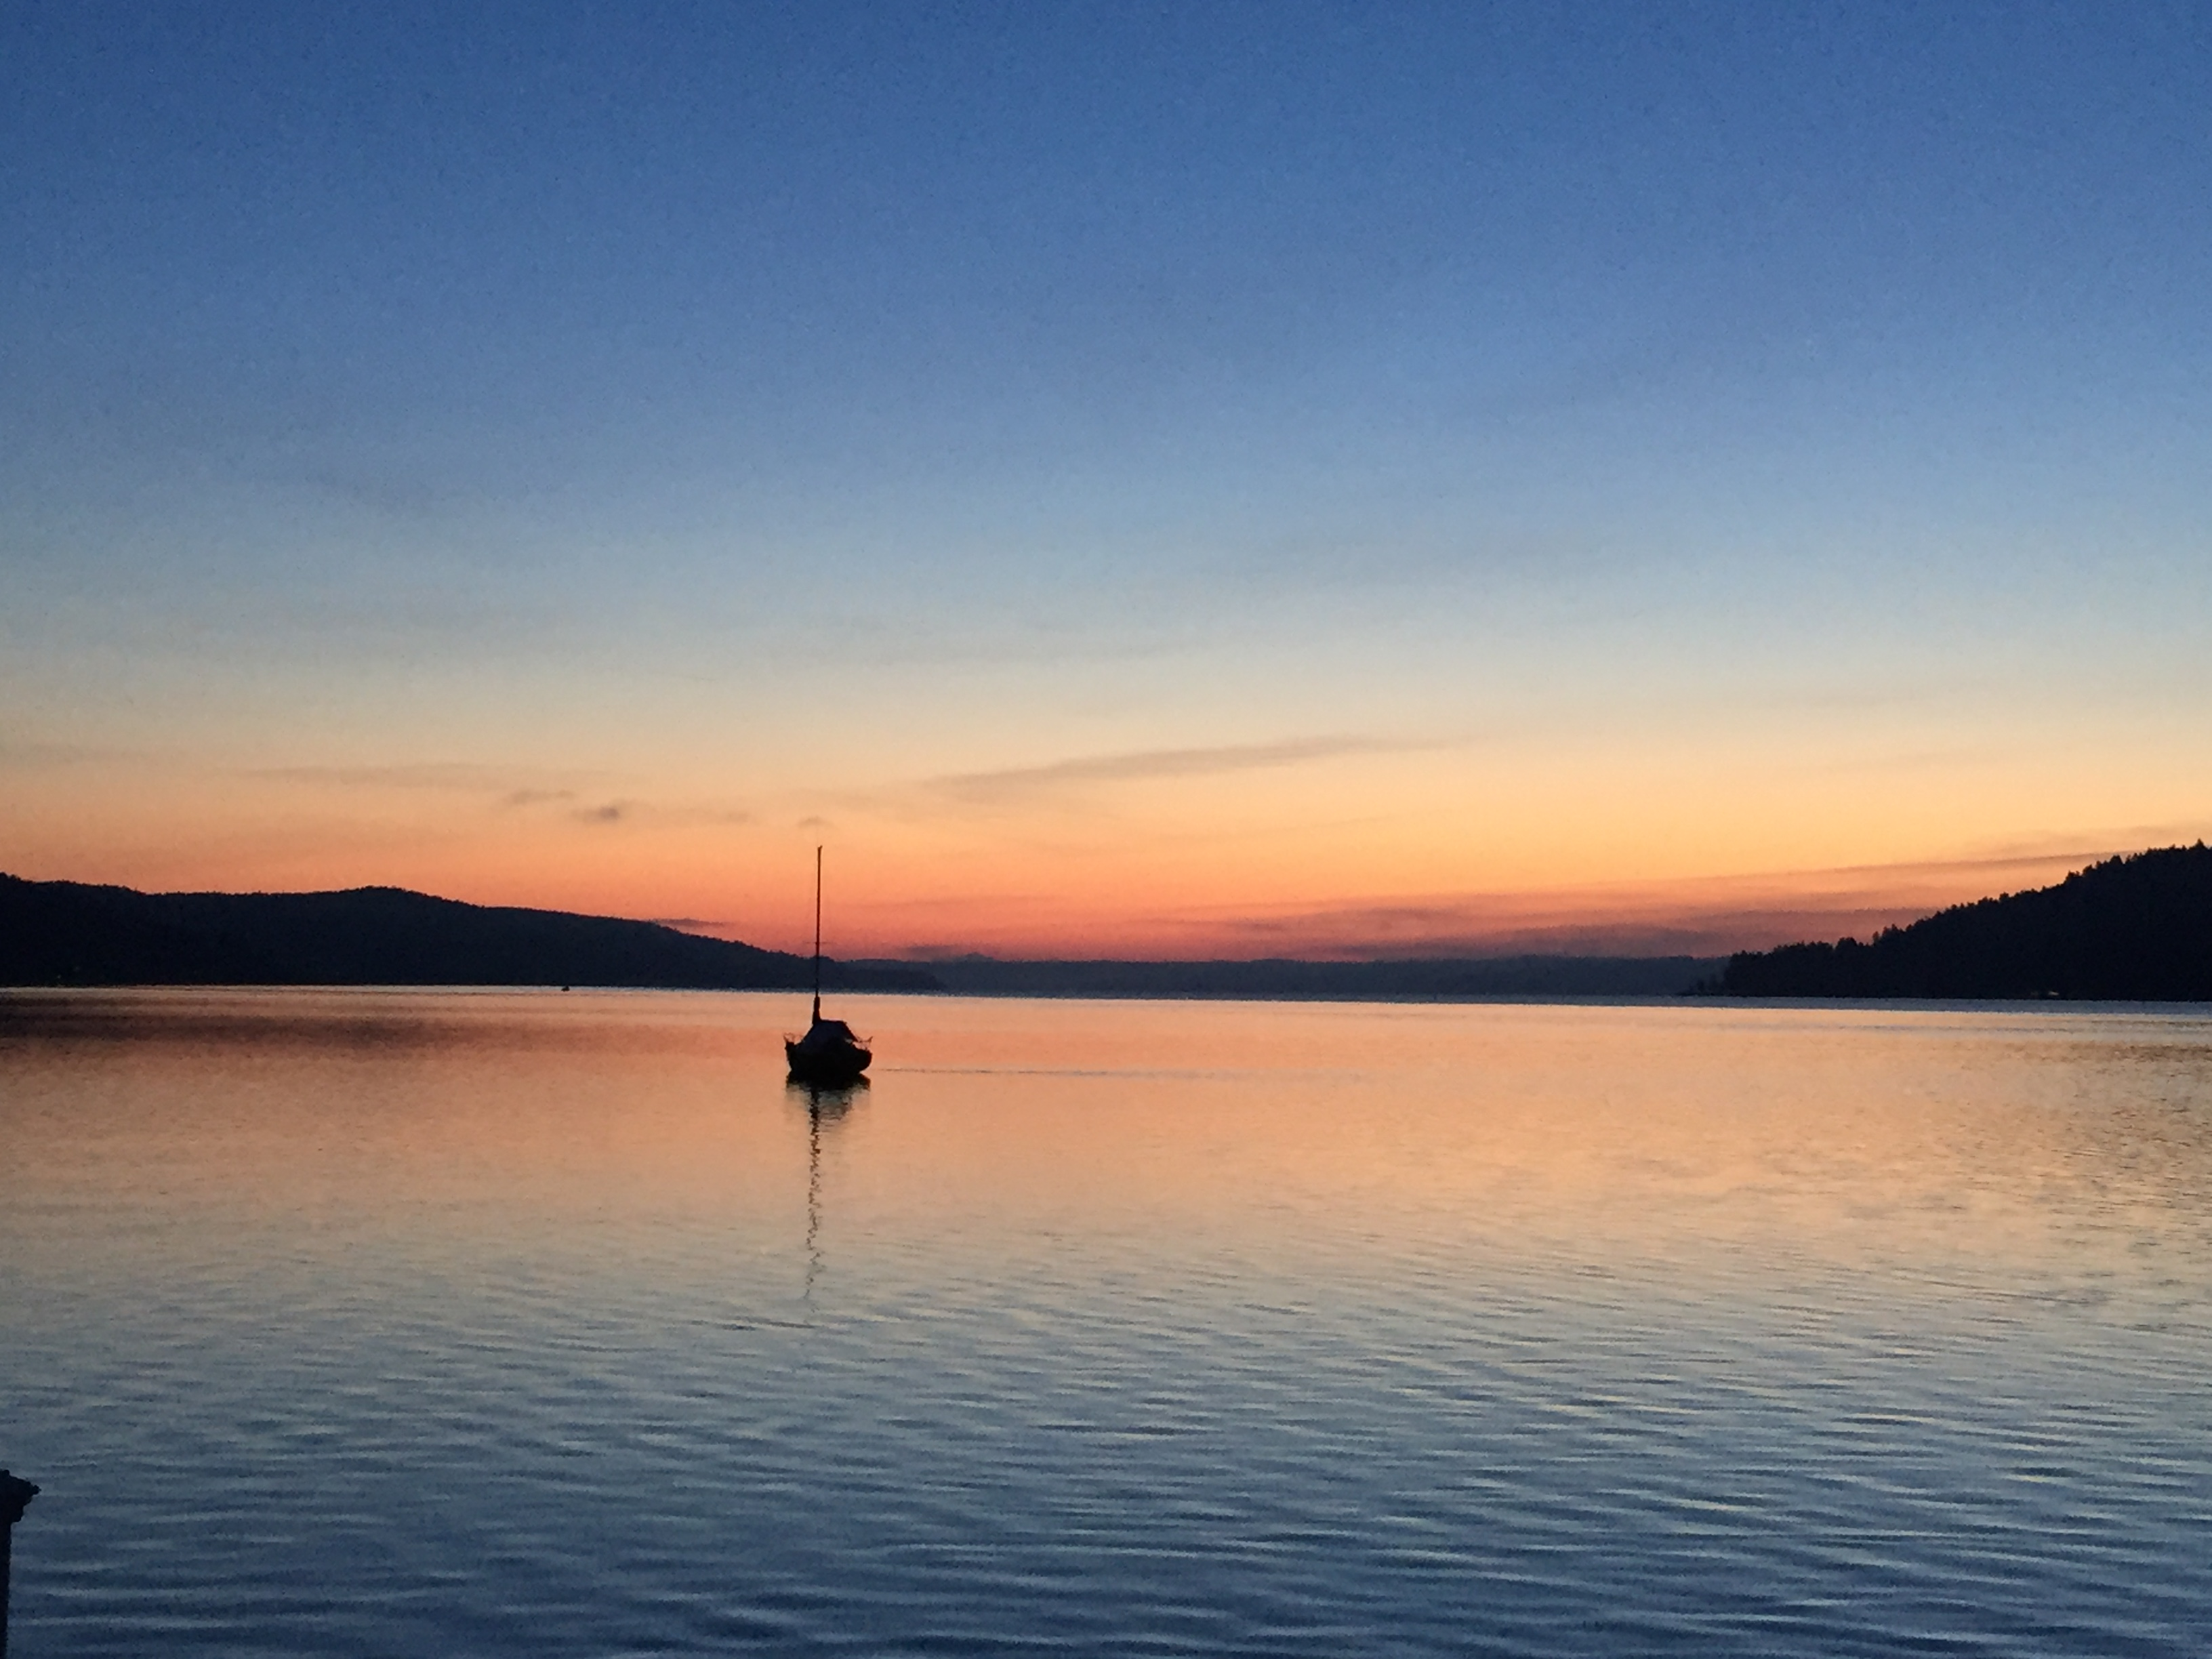

In [21]:
photo = 'images/hood-canal.jpg'   # DEF image to upload
Image(filename=photo)

In [22]:
nim    = 'https://ai.api.nvidia.com/v1/vlm/microsoft/kosmos-2'
prompt = 'what do you see in this photo?'                        # DEF prompt

with open(photo, "rb") as f:
    image_b64 = base64.b64encode(f.read()).decode()

headers = {"Authorization": bearer_key,
           "Accept": "application/json"}

payload = {"messages": [{"role": "user",
                         "content": f'{prompt} <img src="data:image/jpg;base64,{image_b64}" />'}],  # DEF query prompt
           "max_tokens": 1024,
           "temperature": 0.20,
           "top_p": 0.20}

response = requests.post(nim, headers=headers, json=payload)
response_json = json.loads(response.content)
print(response_json['choices'][0]['message']['content'])

A lone sailboat is anchored in the calm waters of a large lake at sunset.


## **vision | microsoft ***florence-2*** | vision language model** ##
### insanely versatile visual foundation model capable of various diverse tasks  ###

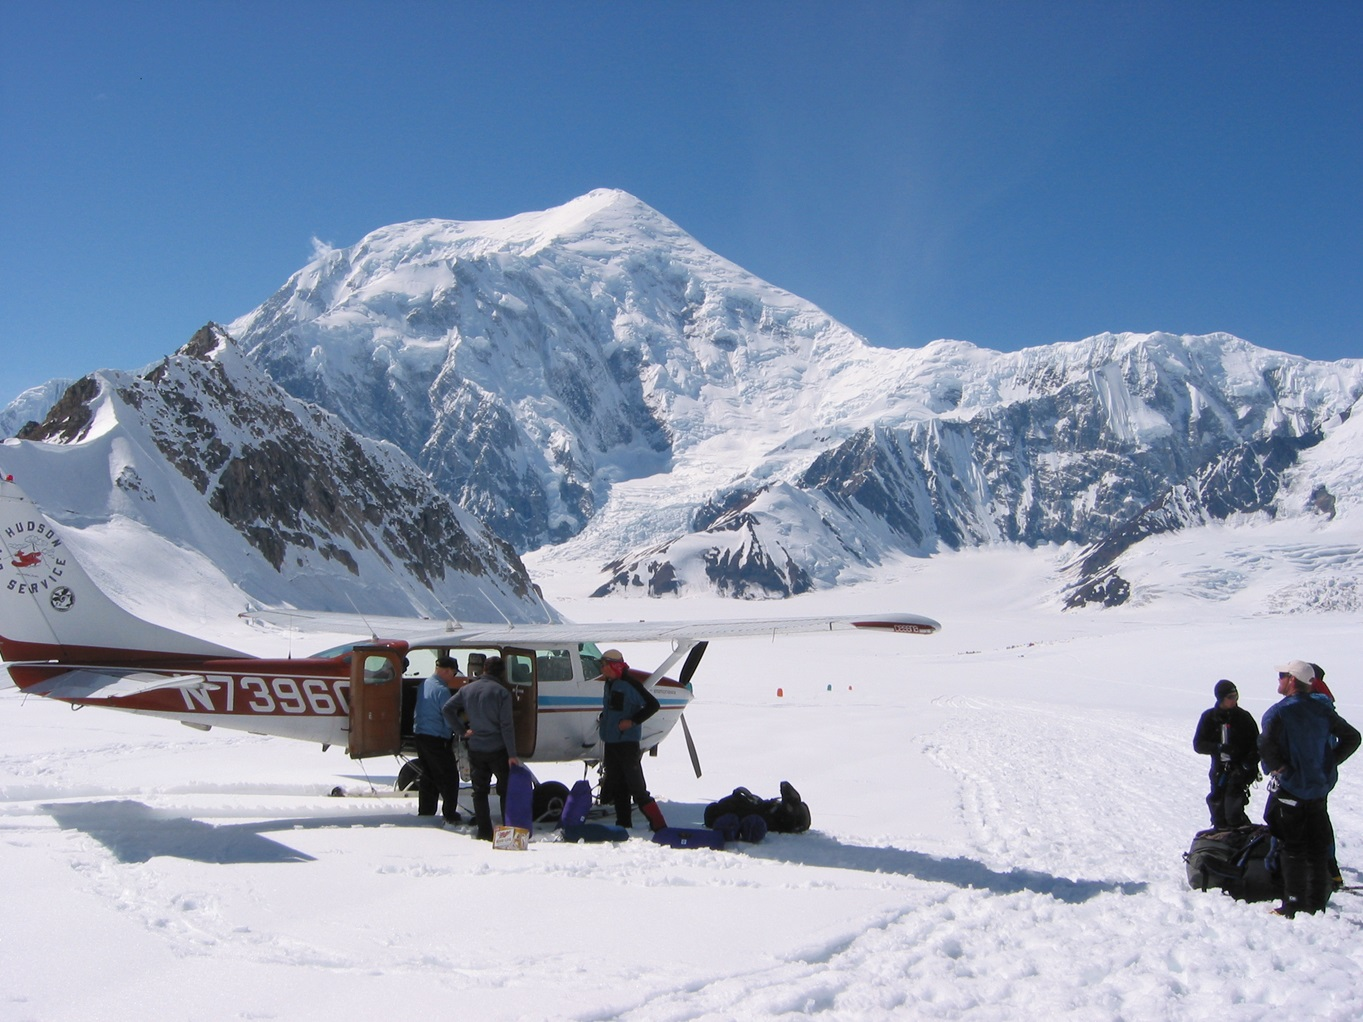

In [28]:
photo = 'images/denali-base-camp.jpg'   # DEF image to upload
Image(filename=photo)

In [29]:
nim = 'https://ai.api.nvidia.com/v1/vlm/microsoft/florence-2'

# index into this list before passing to generate_content function below
prompts = ["<CAPTION>",  "<DETAILED_CAPTION>",  "<MORE_DETAILED_CAPTION>",  "<OD>",  "<DENSE_REGION_CAPTION>",  "<REGION_PROPOSAL>",
           "<CAPTION_TO_PHRASE_GROUNDING>",  "<REFERRING_EXPRESSION_SEGMENTATION>",  "<REGION_TO_SEGMENTATION><loc_312><loc_168><loc_998><loc_846>",
           "<OPEN_VOCABULARY_DETECTION>",  "<REGION_TO_CATEGORY><loc_312><loc_168><loc_998><loc_846>",
           "<REGION_TO_DESCRIPTION><loc_312><loc_168><loc_998><loc_846>",  "<OCR>",  "<OCR_WITH_REGION>"]

def upload_asset(input, description):
    authorize = requests.post("https://api.nvcf.nvidia.com/v2/nvcf/assets",
                              headers={"Authorization": bearer_key,  "Content-Type": "application/json",  "accept": "application/json"},
                              json={"contentType": "image/jpeg", "description": description}, timeout=30)
    authorize.raise_for_status()

    response = requests.put(authorize.json()["uploadUrl"], data=input, 
                            headers={"x-amz-meta-nvcf-asset-description": description,
                                     "content-type": "image/jpeg"},  timeout=300)

    response.raise_for_status()
    return str(authorize.json()["assetId"])

def generate_content(task_id, asset_id):
    prompt  = prompts[task_id]
    content = f'{prompt}<img src="data:image/jpeg;asset_id,{asset_id}" />'
    return content

asset_id = upload_asset(open(photo, "rb"), "test image") 
content  = generate_content(int(3), asset_id)                           # DEF task for model to perform (3 = object detection)

inputs   = {"messages": [{"role": "user",
                          "content": content}]}

headers  = {"Content-Type": "application/json",
            "NVCF-INPUT-ASSET-REFERENCES": asset_id,
            "NVCF-FUNCTION-ASSET-IDS": asset_id,
            "Authorization": bearer_key,
            "Accept": "application/json"}

response = requests.post(nim, headers=headers, json=inputs)

with open(f"test_florence_output.zip", "wb") as out:                   # DEF desired file output name
    out.write(response.content)
with zipfile.ZipFile(f"test_florence_output.zip", "r") as z:           # DEF desired file output name
    z.extractall('test_florence_output')

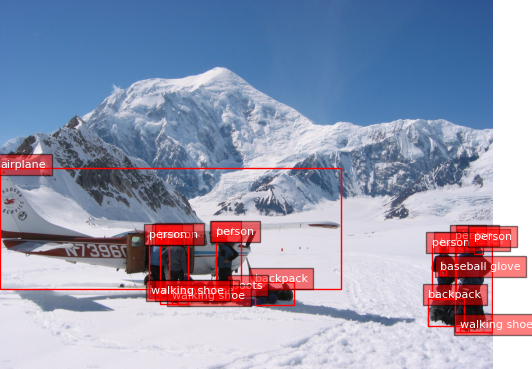

In [30]:
Image(filename='test_florence_output/overlay.png')

## **vision | nvidia ***nv-grounding-dino*** | vision language model** ##
### open vocabulary zero-shot object detection model ###

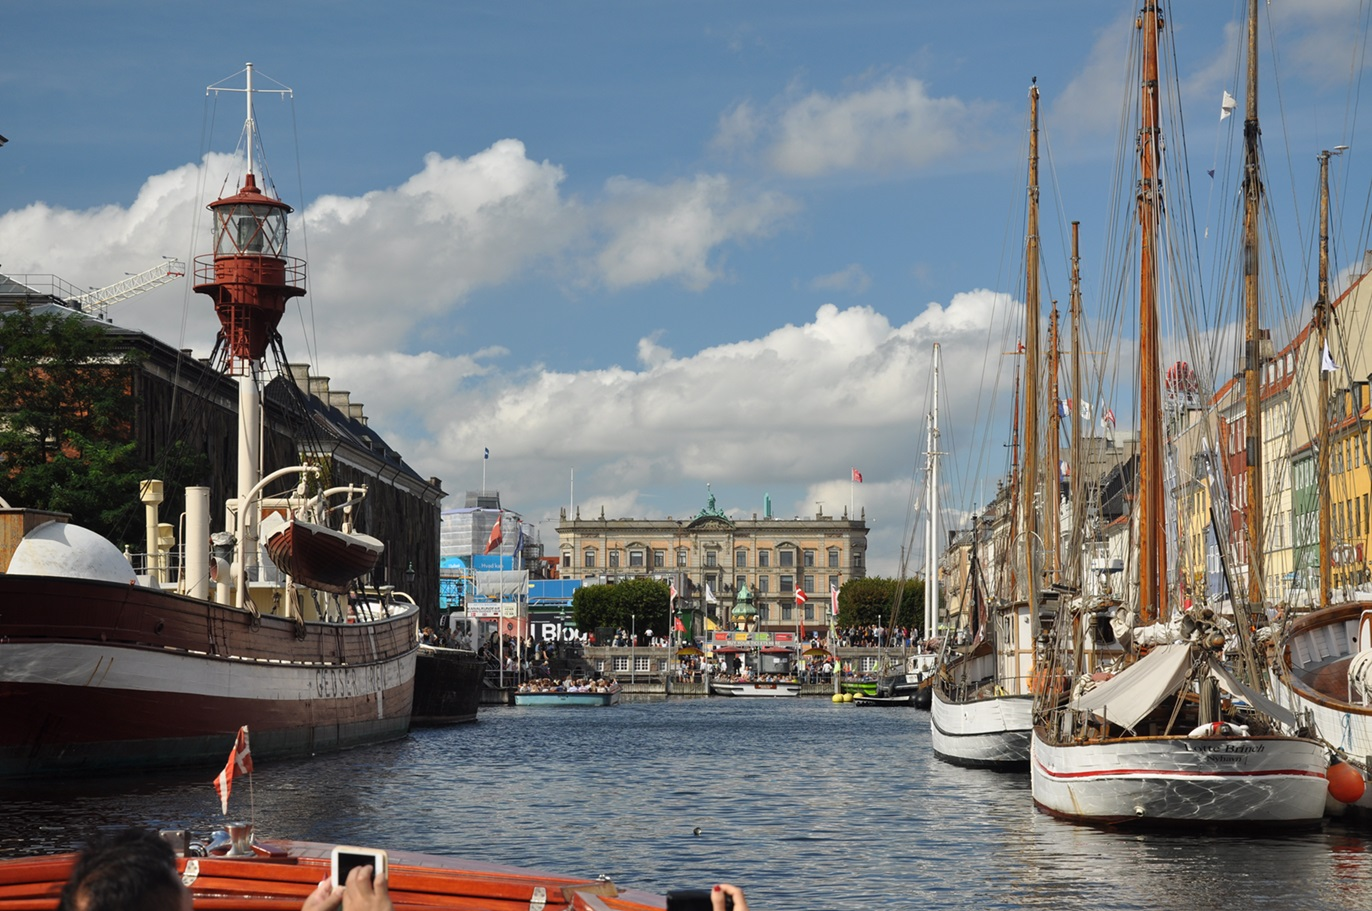

In [31]:
photo = 'images/denmark-harbor.jpg'    # DEF input image
Image(filename=photo)

In [34]:
nim              = 'https://ai.api.nvidia.com/v1/cv/nvidia/nv-grounding-dino'
nvai_polling_url = 'https://api.nvcf.nvidia.com/v2/nvcf/pexec/status/'
prompt           = 'building, ship, flag'                                    # DEF prompt

UPLOAD_ASSET_TIMEOUT = 30  # timeout (in secs) to upload asset
MAX_RETRIES          = 5   # max num of retries while polling
DELAY_BTW_RETRIES    = 1   # add 1s delay between each poll

def upload_asset(input, description):
    assets_url = "https://api.nvcf.nvidia.com/v2/nvcf/assets"

    headers    = {"Authorization": bearer_key,  "Content-Type": "application/json",  "accept": "application/json"}
    s3_headers = {"x-amz-meta-nvcf-asset-description": description,  "content-type": "video/mp4"}
    payload    = {"contentType": "video/mp4", "description": description}

    response = requests.post(assets_url, headers=headers, json=payload, timeout=60)
    response.raise_for_status()

    asset_url = response.json()["uploadUrl"]
    asset_id  = response.json()["assetId"]

    response = requests.put(asset_url, data=input,  headers=s3_headers, timeout=UPLOAD_ASSET_TIMEOUT)
    response.raise_for_status()
    return uuid.UUID(asset_id)

asset_id = upload_asset(open(photo, "rb"), "input image")                       

inputs = {"model": "Grounding-Dino",
          "messages": [{"role": "user",
                        "content": [{"type": "text",
                                     "text": f'{prompt}'},                                  
                                    {"type": "media_url",
                                     "media_url": {"url": f"data:image/jpeg;asset_id,{asset_id}"}}]}],  # DEF media type
          "threshold": 0.3}

asset_list = f"{asset_id}"

headers = {"Content-Type": "application/json",
           "NVCF-INPUT-ASSET-REFERENCES": asset_list,
           "NVCF-FUNCTION-ASSET-IDS": asset_list,
           "Authorization": bearer_key}

response = requests.post(nim, headers=headers, json=inputs)

if response.status_code == 200:   # evaluation complete, output video ready
    with open(f"test_dino_output.zip", "wb") as out:
        out.write(response.content)
    with zipfile.ZipFile(f"test_dino_output.zip", "r") as z:
        z.extractall('test_dino_output')

elif response.status_code == 202: # pending 
        print("pending evaluation ...")
        nvcf_reqid = response.headers['NVCF-REQID']
        nvai_polling_url = nvai_polling_url + nvcf_reqid

        while(MAX_RETRIES):       # poll to check if response is ready
            print(f'Polling ...')
            headers_polling = { "accept": "application/json", "Authorization": header_auth }
            response_polling = requests.get(nvai_polling_url, headers=headers_polling)
            if response_polling.status_code == 202: # evaluation pending
                print('Result is not yet ready.')
                MAX_RETRIES -= 1
                time.sleep(DELAY_BTW_RETRIES)
                continue
            elif response_polling.status_code == 200: # evaluation complete, output video ready
                print('result ready...')
                with open(f"test_dino_output.zip", "wb") as out:
                    out.write(response_polling.content)
                break
            else:
                print(f"unexpected response status: {response_polling.status_code}")

        with zipfile.ZipFile(f"test_dino_output.zip", "r") as z:
            z.extractall('test_dino_output')

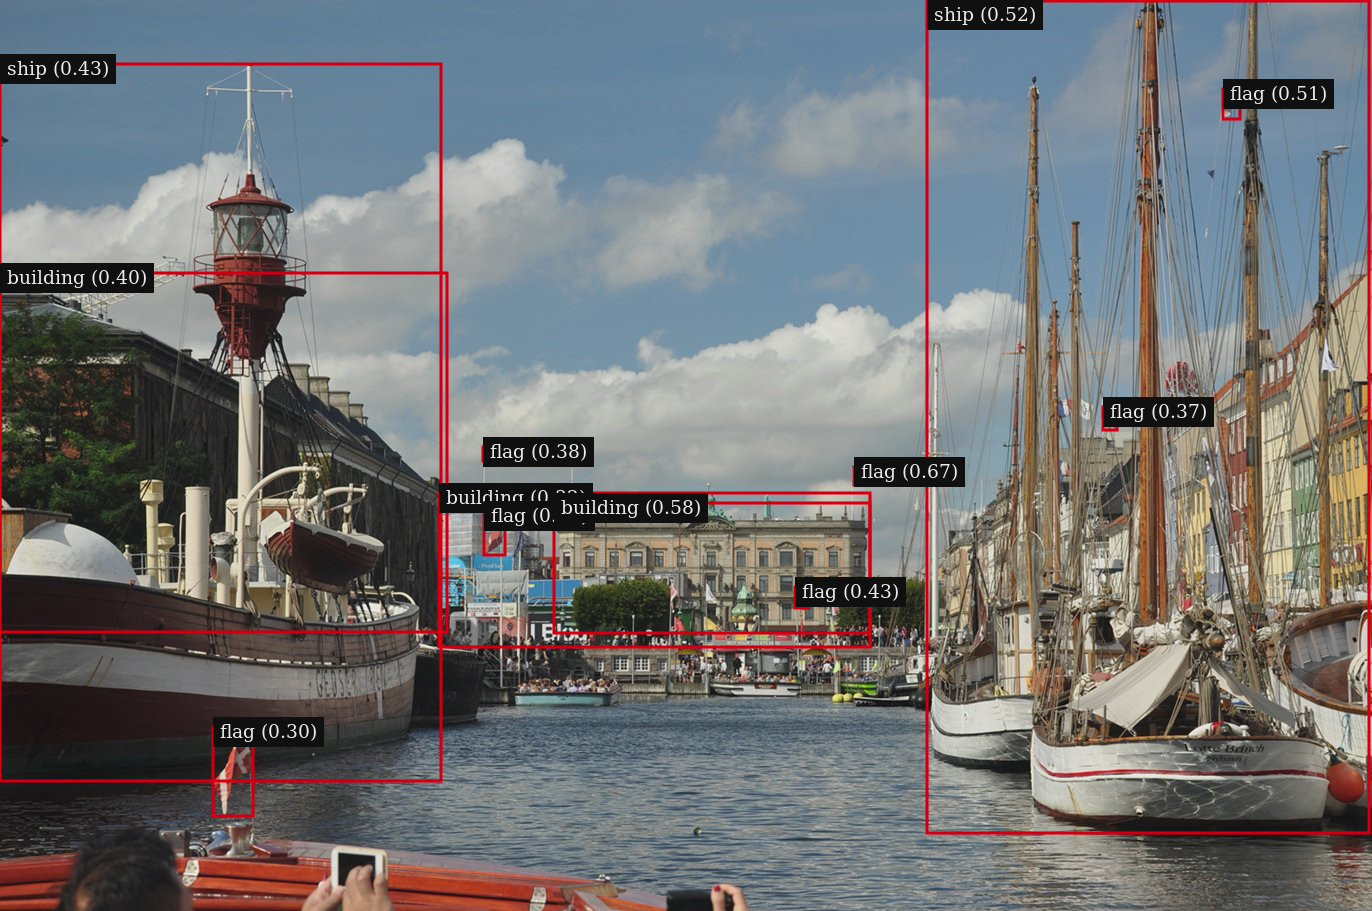

In [35]:
Image(filename='test_dino_output/out1.jpg')

In [36]:
video = 'videos/guadelupe-shark-bait.mp4'        # DEF input video
Video(url=video)

In [37]:
asset_id = upload_asset(open(video, "rb"), "input video")  
prompt   = 'shark, fish'                                   # DEF prompt

inputs = {"model": "Grounding-Dino",
          "messages": [{"role": "user",
                        "content": [{"type": "text",
                                     "text": f'{prompt}'},                                             
                                    {"type": "media_url",
                                     "media_url": {"url": f"data:video/mp4;asset_id,{asset_id}"}}]}],  # DEF media type
          "threshold": 0.3}

asset_list = f"{asset_id}"

headers = {"Content-Type": "application/json",
           "NVCF-INPUT-ASSET-REFERENCES": asset_list,
           "NVCF-FUNCTION-ASSET-IDS": asset_list,
           "Authorization": bearer_key}

response = requests.post(nim, headers=headers, json=inputs)

if response.status_code == 200:   # evaluation complete, output video ready
    with open(f"test_dino_video_output.zip", "wb") as out:
        out.write(response.content)
    with zipfile.ZipFile(f"test_dino_video_output.zip", "r") as z:
        z.extractall('test_dino_video_output')

elif response.status_code == 202: # pending 
        print("pending evaluation ...")
        nvcf_reqid = response.headers['NVCF-REQID']
        nvai_polling_url = nvai_polling_url + nvcf_reqid

        while(MAX_RETRIES):       # poll to check if response is ready
            print(f'polling ...')
            headers_polling = {"accept": "application/json", "Authorization": header_auth}
            response_polling = requests.get(nvai_polling_url, headers=headers_polling)
            if response_polling.status_code == 202: # evaluation pending
                print('Result is not yet ready.')
                MAX_RETRIES -= 1
                time.sleep(DELAY_BTW_RETRIES)
                continue
            elif response_polling.status_code == 200: # evaluation complete, output video ready
                print('result ready...')
                with open(f"test_dino_video_output.zip", "wb") as out:
                    out.write(response_polling.content)
                break
            else:
                print(f"unexpected response status: {response_polling.status_code}")

        with zipfile.ZipFile(f"test_dino_video_output.zip", "r") as z:
            z.extractall('test_dino_video_output')

In [38]:
Video(url='test_dino_video_output/out1.mp4')

## **vision | nvidia ***clip*** | image embeddings** ##
### generates vector embeddings for image or text ###

In [60]:
def process_image(image):
    image_pil  = PIL.Image.open(image)
    buffer     = BytesIO()
    image_pil.save(buffer, format="JPEG")

    image_b64    = base64.b64encode(buffer.getvalue()).decode()
    return image_b64

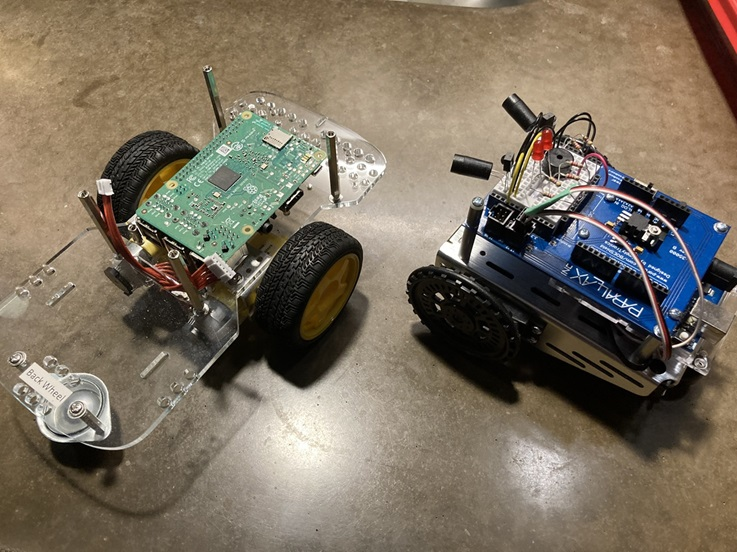

In [42]:
Image(filename='images/alice-reggie-small.jpg')

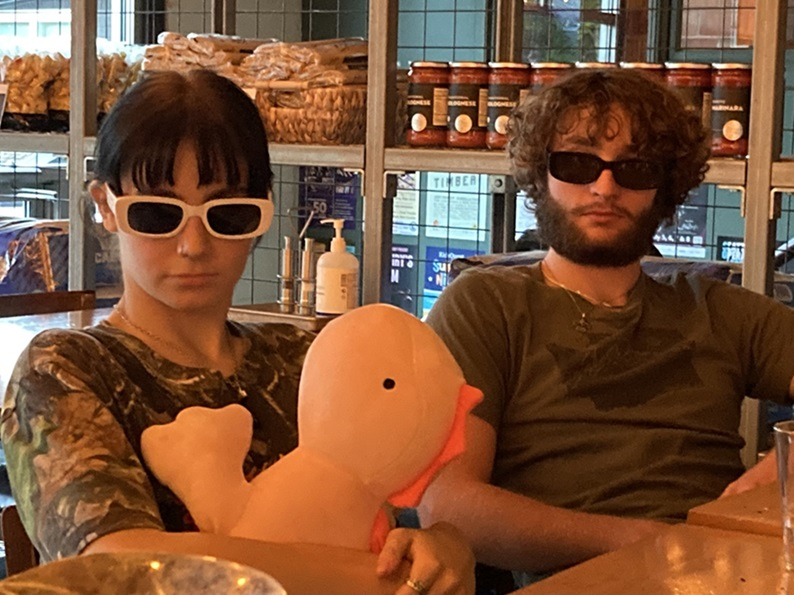

In [44]:
Image(filename='images/ruby-brady-small.jpg')

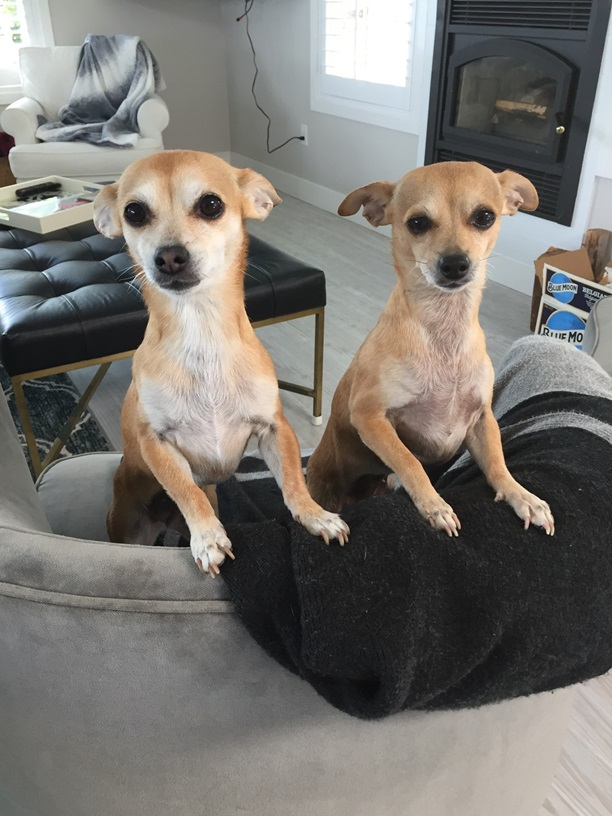

In [45]:
Image(filename='images/olivia-lily-small.jpg')

In [71]:
image_files   = ['images/alice-reggie-small.jpg', 'images/ruby-brady-small.jpg', 'images/olivia-lily-small.jpg']
images_base64 = [f"data:image/jpeg;base64,{process_image(image)}" for image in image_files]

response = client.embeddings.create(input=images_base64,  model="nvidia/nvclip",  encoding_format="float")
image_embeddings = np.array([response.data[i].embedding for i in range(len(image_files))])

response = client.embeddings.create(input='two dogs on a couch',  model="nvidia/nvclip",  encoding_format="float")   # DEF comparison prompt
text_embedding = np.array(response.data[0].embedding).reshape(1, -1)

similarity_scores    = cosine_similarity(text_embedding, image_embeddings)[0]
softmax_denominator  = np.exp(similarity_scores).sum()
similarity_scores_sm = np.exp(similarity_scores) / softmax_denominator

print('similarity scores:  ', similarity_scores_sm)
print('most similar image: ', image_files[np.argmax(similarity_scores_sm)])

similarity scores:   [0.30189505 0.32602245 0.3720825 ]
most similar image:  images/olivia-lily-small.jpg


In [29]:
# pause and reflect on what just happened: it found the high dimensional embedding of the IMAGE of the dogs as the embedding
# closest to the TEXT embedding in representation space. also check out the recent nvda nvlm and meta transfusion papers!! amazing

## **visual design | stabilityAI ***stable-diffusion-xl*** | image generation model** ##
### diffusion-based text to image model ###

In [35]:
nim    = 'https://ai.api.nvidia.com/v1/genai/stabilityai/stable-diffusion-xl'
prompt = 'large tank at a public aquarium with multiple baby animals happily swimming in the water. none of the animals are fish but \
          instead all of the animals can be found in africa such as lions, tigers, elephants, antelope, and other land animals.'

headers = {"Authorization": bearer_key,
           "Accept": "application/json"}

payload = {"text_prompts": [{"text": prompt,  "weight": 1}],
           "cfg_scale": 5,
           "sampler": "K_DPM_2_ANCESTRAL",
           "seed": 0,
           "steps": 30}

response = requests.post(nim, headers=headers, json=payload)
response.raise_for_status()
response_body = response.json()['artifacts'][0]['base64']
img      = base64.b64decode(response_body)
img_file = open('test_sdxl_output.jpg', 'wb')
img_file.write(img)

230557

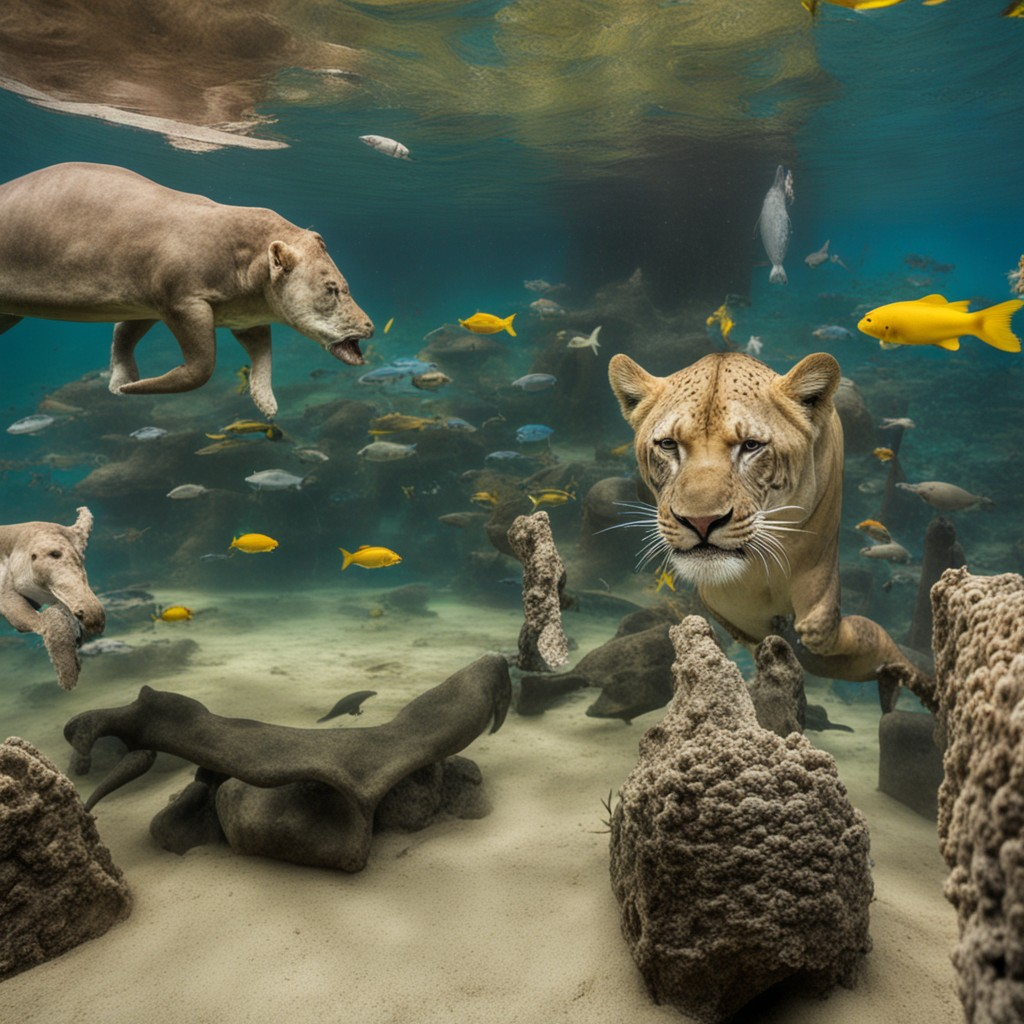

In [36]:
Image(filename='test_sdxl_output.jpg')

## **retrieval | nvidia ***embedqa-e5-v5*** | language encoder** ##
### generation of text embeddings for q/a retrieval ###

In [72]:
nim    = 'nvidia/nv-embedqa-e5-v5'
prompt = 'my grocery purchases for today include bagels, coffee and cheddar cheese. i like to eat those every morning.'

client = OpenAI(api_key=api_key, base_url="https://integrate.api.nvidia.com/v1")

response = client.embeddings.create(input=[prompt], model=nim, encoding_format="float", extra_body={"input_type": "query", "truncate": "NONE"})

original_embedding = np.array(response.data[0].embedding)
print(original_embedding[:8])
print('length of embedding: ', len(original_embedding))

[-0.0125351   0.008255    0.06427002  0.02268982  0.01968384  0.04547119
  0.00738525 -0.01928711]
length of embedding:  1024


In [73]:
# wrap the function we used above so we can calc embeddings for comparison sentences
def calculate_embedding(sentence):
    response = client.embeddings.create(input=[sentence], model=nim, encoding_format='float', extra_body={"input_type": "query", "truncate": "NONE"})
    return np.array(response.data[0].embedding)

In [75]:
# compare the last embedding with the meaning of other phrases (yes there are lookup services for this but doing this for education purposes)
compare1 = 'in the tragic shakespeare play today the king choked and died on a bagel, upon which there was too much cream cheese' # 5 word matches
compare2 = 'ricky bobby likes to drink plenty of coffee before races so he can drive fast'                                        # 3 word matches
compare3 = 'i am going to the supermarket to buy breakfast food such as eggs and bacon'                                           # 1 word match

sentences = [compare1, compare2, compare3]

original_embedding    = original_embedding.reshape(1, -1)
comparison_embeddings = np.array([calculate_embedding(sentence) for sentence in sentences])

# yes there are simple retriever utils to do this but i want to manually illuminate the magic of (meaning-based) comparison based on embeddings
similarity_scores    = cosine_similarity(original_embedding, comparison_embeddings)[0]
softmax_denominator  = np.exp(similarity_scores).sum()
similarity_scores_sm = np.exp(similarity_scores) / softmax_denominator

print('similarity scores:     ', similarity_scores_sm)
print('most similar sentence: ', sentences[np.argmax(similarity_scores_sm)])

similarity scores:      [0.32758069 0.30471225 0.36770707]
most similar sentence:  i am going to the supermarket to buy breakfast food such as eggs and bacon


## **simulation | nvidia ***usdcode-llama3-70b-instruct*** | USD coding** ##
### answers openUSD knowledge queries and generates USD-python code ###

In [76]:
client = OpenAI(base_url = "https://integrate.api.nvidia.com/v1",  api_key = api_key)
prompt = 'write a python function that slowly collapses all the 3 dimensional objects in an omniverse stage \
          into a 2 dimensional plane like the last scene of the 3 body problem book series'

completion = client.chat.completions.create(model="nvidia/usdcode-llama3-70b-instruct",
                                            messages=[{"role":"user", "content":prompt}],
                                            temperature=0.1,  top_p=1,  max_tokens=1024,  stream=True)

for chunk in completion:
    if chunk.choices[0].delta.content is not None:
        print(chunk.choices[0].delta.content, end="")

Here is a Python function that collapses all 3D objects in a USD stage into a 2D plane:
```python
from pxr import Usd, UsdGeom, Gf

def collapse_to_2d(stage: Usd.Stage) -> None:
    """Collapse all 3D objects in the stage into a 2D plane."""
    # Get all visible geometry prims in the stage
    all_geom = [prim for prim in stage.Traverse() if UsdGeom.Imageable(prim).ComputeVisibility() != UsdGeom.Tokens.invisible]

    # Create a 2D plane at z=0
    plane_path = Sdf.Path("/Plane")
    plane = UsdGeom.Xform.Define(stage, plane_path)
    plane.AddTranslateOp().Set(Gf.Vec3d(0, 0, 0))

    # Iterate over all geometry prims and collapse them to the 2D plane
    for prim in all_geom:
        # Get the bounding box of the prim
        bbox = UsdGeom.Imageable(prim).ComputeWorldBound(0.0, UsdGeom.Tokens.default_)
        range = bbox.ComputeAlignedRange()

        # Calculate the center of the bounding box
        center = (range.GetMin() + range.GetMax()) / 2

        # Create a new Xform pri

## **simulation | nvidia ***usdsearch*** | USD search** ##
### searches openUSD data, models, images and assets using text or images ###

In [137]:
search_prompt = 'worklight'   # DEF asset to search for

response = requests.post(url='https://ai.api.nvidia.com/v1/omniverse/nvidia/usdsearch',
                         headers={'Authorization': bearer_key,
                                  'Accept': 'application/json',
                                  'Content-Type': 'application/json'},
                         data=json.dumps(dict(description = search_prompt,
                                              file_extension_include ='usd*',
                                              return_images ='true',
                                              return_metadata = 'true',
                                              return_vision_generated_metadata = 'true',
                                              cutoff_threshold = '1.05',
                                              limit = '10')))

response_json = json.loads(response.content)

In [151]:
print('showing first 5 of {} images returned...'.format(len(response_json)))
for i in range(5):
    print('file name: ', os.path.basename(response_json[i]['url']).split('/')[-1])
    # TODO: code to render USD image in a jupyter notebook: is there an easy USD -> jpg/png/other function/library?? need to find

showing first 5 of 10 images returned...
file name:  Worklight_A01_01.usd
file name:  Worklight_A02_01.usd
file name:  Worklight_C03_01.usd
file name:  Worklight_C02_01.usd
file name:  SecurityScanner_A01_01.usd


## **safety & moderation | hive ***ai-generated-image-detection*** | deepfake image detection** ##
### image classification model for detecting and managing AI-generated content ###

In [77]:
nim = 'https://ai.api.nvidia.com/v1/cv/hive/ai-generated-image-detection'

def upload_asset(path, desc):
    assets_url = "https://api.nvcf.nvidia.com/v2/nvcf/assets"
    headers = {"Content-Type": "application/json",  "Authorization": bearer_key,  "accept": "application/json"}
    payload = {"contentType": "image/jpg",  "description": desc}

    response = requests.post(assets_url, headers=headers, json=payload, timeout=30)

    current_pre_signed_url = response.json()["uploadUrl"]
    asset_id = response.json()["assetId"]
    headers = {"Content-Type": "image/jpg", "x-amz-meta-nvcf-asset-description": desc}

    input_data = open(path, "rb")
    response = requests.put(current_pre_signed_url, data=input_data,  headers=headers,  timeout=300)
    return asset_id

def image_test(input_image_path, confidence):
    with open(input_image_path, "rb") as f:
        image_b64 = base64.b64encode(f.read()).decode()

    if len(image_b64) < 180_000:
        payload = {"input": [f"data:image/jpg;base64,{image_b64}"]}
        headers = {"Content-Type": "application/json",  "Authorization": bearer_key,  "Accept": "application/json"}
    else:
        asset_id = upload_asset(input_image_path, "input image")
        payload = {"input": [f"data:image/jpg;asset_id,{asset_id}"]}
        headers = {"Content-Type": "application/json",  "NVCF-INPUT-ASSET-REFERENCES": asset_id,  "Authorization": bearer_key}

    response = requests.post(nim, headers=headers, json=payload).json()['data'][0]

    print('processing image:     ', input_image_path)
    print('belief image is fake: ', response['is_ai_generated'])
    
    if response['is_ai_generated'] > confidence: 
        source_model = max(response['possible_sources'], key=response['possible_sources'].get)
        print('source tool theory:   ', source_model)
        print('model confidence:     ', response['possible_sources'][source_model])

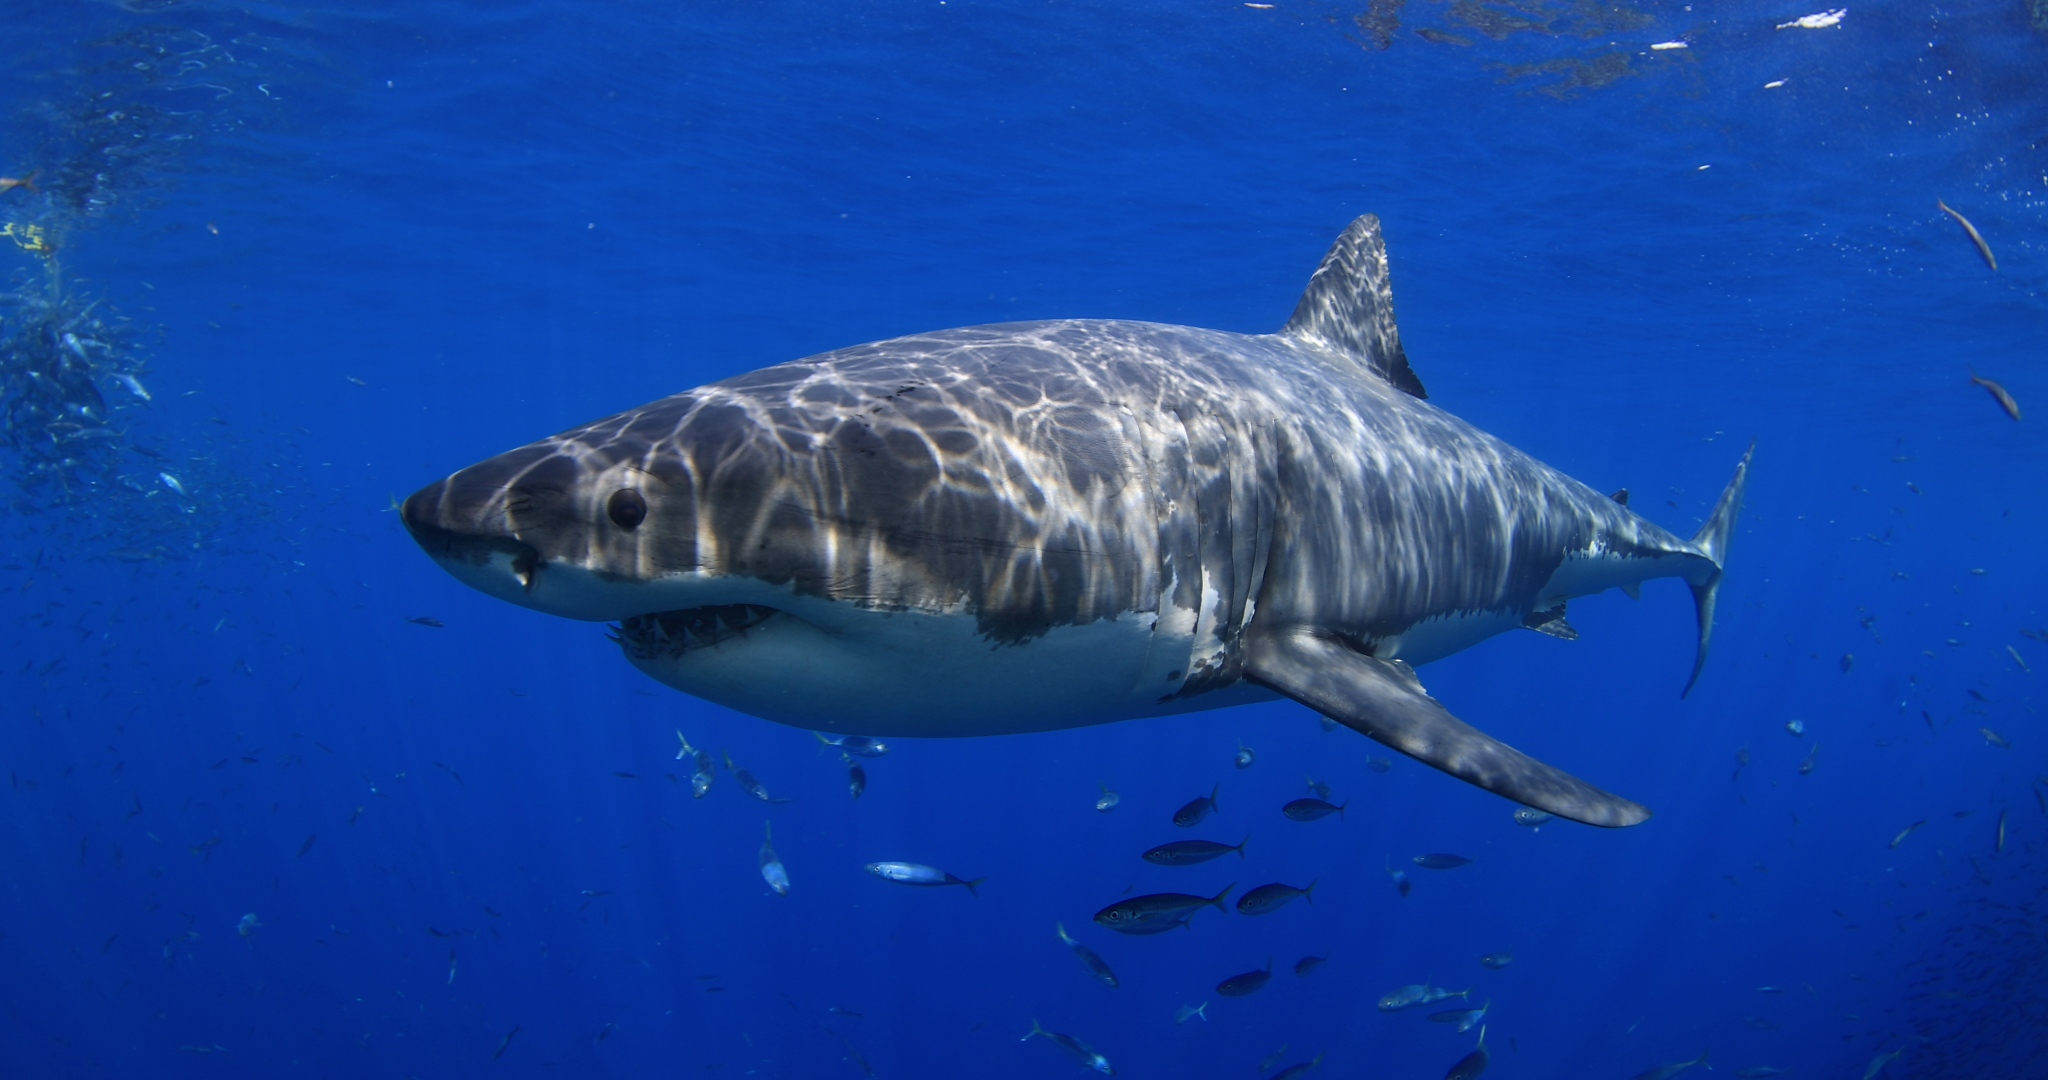

In [78]:
photo = 'images/guadelupe-trip.jpg'   # DEF input image
Image(filename=photo)

In [79]:
#  test real image
image_test(photo, 0.6)

# test fake image
print()
input_image = 'test_sdxl_output.jpg'   # DEF input image
image_test(input_image, 0.6)

processing image:      images/guadelupe-trip.jpg
belief image is fake:  0.00035309779923409224

processing image:      test_sdxl_output.jpg
belief image is fake:  0.9996572732925415
source tool theory:    stablediffusion
model confidence:      0.7265278100967407
